# Initial Data Visualization with Matplotlib and Dash
## Objective
Create effective and engaging data visualizations using matplotlib and Dash. The goal is to produce publication-quality static graphics and an interactive visualization that conveys complex data clearly and effectively

### Import the necessary libraries

In [1]:
import h5py
import matplotlib.pyplot as plt
import imageio
%pip install imageio[ffmpeg]


Note: you may need to restart the kernel to use updated packages.


In [2]:
# imports useful packages
import warnings
warnings.filterwarnings('ignore')
import importlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from scipy import io
import numpy as np
import os
import os.path
from IPython.display import IFrame
from IPython.display import HTML
import sidpy
import pyUSID as usid
# Finally, BGlib itself
from BGlib import be as belib
import scipy.io

### Convert Dataset file format from .mat to .h5

##### Why convert to .h5 file format?
H5 files
- are like smart containers that can store matrices with data, folders to organize these datasets, images, metadata like experimental parameters, links or shortcuts to datasets, etc.

- are readily compatible with high-performance computing facilities

- scale very efficiently from few kilobytes to several terabytes

- can be read and modified using any language including Python, Matlab, C/C++, Java, Fortran, Igor Pro, etc.[1]

[1]Suhas Somnath, Chris R. Smith, Stephen Jesse. (2020, Sep.). "Band Excitation Data Processing." The Center for Nanophase Materials Science and The Institute for Functional Imaging for Materials, Oak Ridge National Laboratory. [Online]. Available: https://pycroscopy.github.io/BGlib/notebooks/be/BE_Processing.html

In [3]:
import h5py
import scipy.io

def convert_mat_to_h5(input_mat_path, output_h5_path):
    # Load data from MATLAB file
    mat_data = scipy.io.loadmat(input_mat_path)

    # Create an HDF5 file and write data
    with h5py.File(output_h5_path, 'w') as h5_file:
        for key, value in mat_data.items():
            h5_file.create_dataset(key, data=value)

# File paths
data_mat_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\Data.mat'
validation_mat_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\loop_1.mat'

data_h5_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\Data.h5'
validation_h5_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\loop_1.h5'

# Convert data file
convert_mat_to_h5(data_mat_path, data_h5_path)

# Convert validation data file
convert_mat_to_h5(validation_mat_path, validation_h5_path)


In [4]:
# Path to the HDF5 file
h5_file_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\Data.h5'

# Open the HDF5 file in read mode to view the contents of the file
with h5py.File(h5_file_path, 'r') as h5_file:
    
    # Print the group/dataset names at the root level of the HDF5 file
    print("Groups/Datasets in the HDF5 file:")
    print(list(h5_file.keys()))

Groups/Datasets in the HDF5 file:
['Acosarea_caca', 'Acosarea_mixed', 'Acosareadif_caca', 'Acosareadif_mixed', 'Acosareafit_caca', 'Acosareafit_mixed', 'AcoscentAc_caca', 'AcoscentAc_mixed', 'AcoscentAcfit_caca', 'AcoscentAcfit_mixed', 'AcoscentV_caca', 'AcoscentV_mixed', 'AcoscentVfit_caca', 'AcoscentVfit_mixed', 'Acosheight_caca', 'Acosheight_mixed', 'Acosnegnuc_caca', 'Acosnegnuc_mixed', 'Acosposnuc_caca', 'Acosposnuc_mixed', 'Acosrot_mixed', 'Acostwist_caca', 'Acostwist_mixed', 'Acoswidth_caca', 'Acoswidth_mixed', 'Al_caca', 'Al_mixed', 'AmpFinal', 'AmpOriginal', 'Asinarea_mixed', 'Asinrot_mixed', 'Asintwist_mixed', 'Au_caca', 'Au_mixed', 'HeightFinal', 'HeightOriginal', 'Lat_PFM_caca', 'LineTrace', 'Loopdata_caca', 'Loopdata_mixed', 'NormAcCent_caca', 'NormAcCent_mixed', 'NormVCent_caca', 'NormVCent_mixed', 'OutA1_caca', 'OutA1_mixed', 'OutA2_caca', 'OutA2_mixed', 'OutPhi1_caca', 'OutPhi1_mixed', 'OutPhi2_caca', 'OutPhi2_mixed', 'OutQ1_caca', 'OutQ1_mixed', 'OutQ2_caca', 'OutQ2_mi

In [5]:
import h5py

data_h5_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\Data.h5'
validation_h5_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\loop_1.h5'

with h5py.File(data_h5_path, 'r') as h5_data_file, \
        h5py.File(validation_h5_path, 'r') as h5_validation_file:

    # Extract the important information from the HDF5 files
    raw = {
        'voltage': h5_data_file['Voltagedata_mixed'][:],
        'piezoresponse': h5_data_file['Loopdata_mixed'][:],
        'amplitude': h5_data_file['OutA2_mixed'][:],
        'phase': h5_data_file['OutPhi1_mixed'][:],
        'resonance': h5_data_file['Outw2_mixed'][:],
        'quality_factor': h5_data_file['OutQ2_mixed'][:],
        'val_piezoresponse': h5_validation_file['piezo_1'][:],
        'val_resonance': h5_validation_file['resonance_loop_1'][:]
    }

# Now 'raw' dictionary contains the extracted data from the HDF5 files
# Check dimensions of different groups
for key, value in raw.items():
    print(f"Group: {key}, Dimensions: {value.shape}")

Group: voltage, Dimensions: (96, 1)
Group: piezoresponse, Dimensions: (60, 60, 96)
Group: amplitude, Dimensions: (60, 60, 96)
Group: phase, Dimensions: (60, 60, 96)
Group: resonance, Dimensions: (60, 60, 96)
Group: quality_factor, Dimensions: (60, 60, 96)
Group: val_piezoresponse, Dimensions: (60, 60, 96)
Group: val_resonance, Dimensions: (60, 60, 96)


#### Initial Data Visualization
##### Static Plots using Matplotlib and interactive plots using Dash


#### Summary:
The plot below illustrates the relationship between voltage and piezoresponse for five selected spatial coordinates in a band excitation piezoresponse force microscopy experiment. Each line corresponds to a specific spatial coordinate, with colors indicating the spatial position. The legend includes the x and y coordinates for the starting point of each line. The x-axis represents the voltage (in volts), and the y-axis represents the piezoresponse (in arbitrary units). The roughness in the lines is a characteristic feature of raw data in this type of experiment.

Explanation:
In a band excitation piezoresponse force microscopy experiment, the piezoresponse, which measures the material's response to an applied voltage, is recorded for different spatial coordinates. The roughness in the lines is often attributed to the inherent noise and variations in the experimental conditions. It may also capture fine details or variations in the material's properties at the nanoscale.

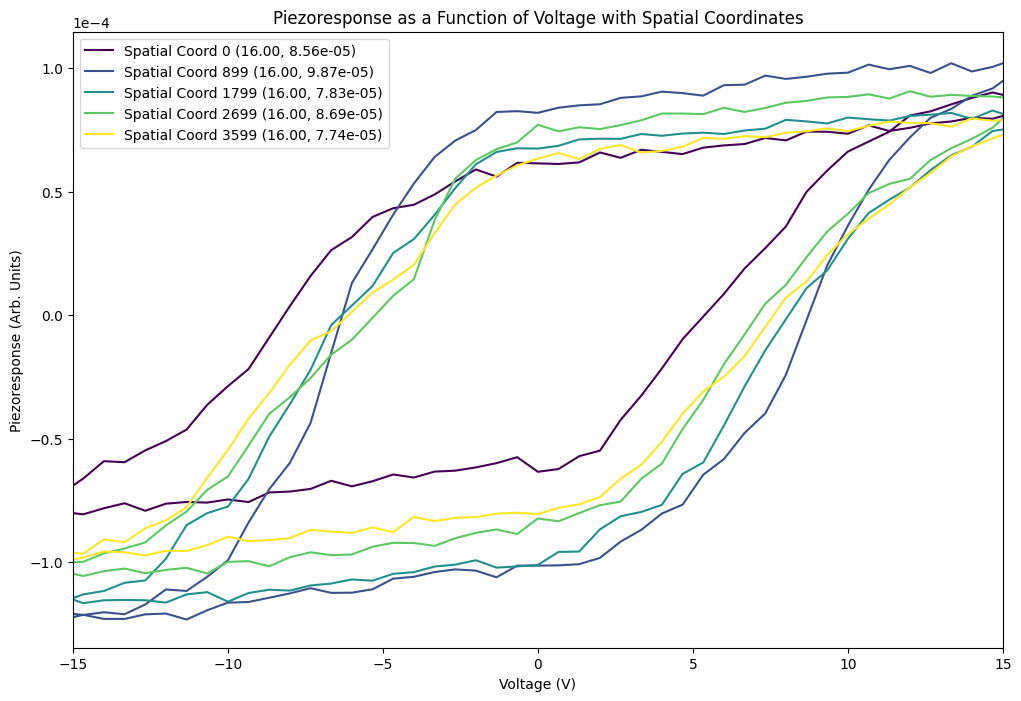

In [6]:
import matplotlib.pyplot as plt

# Extract relevant data for plotting
voltage_values = raw['voltage'].reshape(-1)  # Flatten the voltage array
piezoresponse_data = raw['piezoresponse'].reshape((60 * 60, 96))  # Reshape the piezoresponse data

# Select 5 evenly spaced spatial coordinates for better visibility
spatial_locations_to_plot = np.linspace(0, piezoresponse_data.shape[0] - 1, 5, dtype=int)

# Create a single plot with spatial coordinates represented as colors
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate over selected spatial locations and plot piezoresponse against voltage
for i in spatial_locations_to_plot:
    x_coords = voltage_values
    y_coords = piezoresponse_data[i, :]
    ax.plot(x_coords, y_coords,
            label=f'Spatial Coord {i} ({x_coords[0]:.2f}, {y_coords[0]:.2e})',
            color=plt.cm.viridis(i / piezoresponse_data.shape[0]))

# Set x-axis limits
ax.set_xlim(-15, 15)

# Set x and y axis labels with units
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Piezoresponse (Arb. Units)')

# Add legend
ax.legend()

# Use scientific notation for y-axis ticks
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.title('Piezoresponse as a Function of Voltage with Spatial Coordinates')
plt.show()

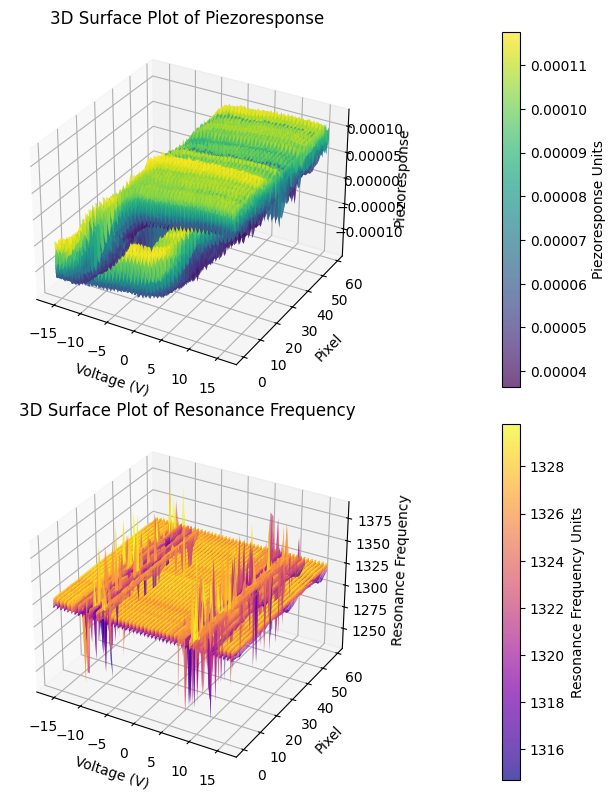

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data
voltage = raw['voltage']
piezoresponse = raw['piezoresponse']
resonance = raw['resonance']

# Create a 3D plot
fig = plt.figure(figsize=(14, 8))
ax_piezo = fig.add_subplot(211, projection='3d')
ax_resonance = fig.add_subplot(212, projection='3d')

for i in range(len(voltage)):
    # Create a meshgrid for 3D plotting
    V, P = np.meshgrid(voltage[i], np.arange(60))
    V, R = np.meshgrid(voltage[i], np.arange(60))

    # Plot the 3D surface for piezoresponse
    surf_piezo = ax_piezo.plot_surface(V, P, piezoresponse[:,:,i].T, cmap='viridis', alpha=0.7)

    # Plot the 3D surface for resonance frequency
    surf_resonance = ax_resonance.plot_surface(V, R, resonance[:,:,i].T, cmap='plasma', alpha=0.7)

# Add color bars
cbar_piezo = fig.colorbar(surf_piezo, ax=ax_piezo, pad=0.1)
cbar_resonance = fig.colorbar(surf_resonance, ax=ax_resonance, pad=0.1)

# Customize the plot for piezoresponse
ax_piezo.set_xlabel('Voltage (V)')
ax_piezo.set_ylabel('Pixel')
ax_piezo.set_zlabel('Piezoresponse')
ax_piezo.set_title('3D Surface Plot of Piezoresponse')
cbar_piezo.set_label('Piezoresponse Units')

# Customize the plot for resonance frequency
ax_resonance.set_xlabel('Voltage (V)')
ax_resonance.set_ylabel('Pixel')
ax_resonance.set_zlabel('Resonance Frequency')
ax_resonance.set_title('3D Surface Plot of Resonance Frequency')
cbar_resonance.set_label('Resonance Frequency Units')

# Show the plot
plt.tight_layout()
plt.show()


### Data Cleaning(Preprocessing)

Define a set of functions for filtering and processing data, commonly used in signal processing and data analysis. Here's a brief explanation of each function:

1. range_filter(data, min_max):

Purpose: Applies a max-min filter to the input data, clipping values outside the specified range (min_max).
Usage: Removes outliers or data points that fall outside the desired range.

2. clean_interpolate(data, method='linear'):

Purpose: Interpolates data to handle non-real values in the input data, typically arising from fitting failures or missing values.
Usage: Ensures a continuous and smooth representation of the data by filling in missing or non-real values using interpolation.

3. savgol(data, fit_type='linear'):

Purpose: Applies the Savitzky-Golay filter to the input data, a technique for smoothing noisy signals while preserving important features.
Usage: Removes high-frequency noise from the data, making it suitable for subsequent analysis and visualization.

4. normalize(data, reference=None):

Purpose: Normalizes the input data by subtracting the mean and dividing by the standard deviation. The optional reference parameter allows normalization based on a reference dataset.
Usage: Ensures that different signals or parameters are on a similar scale, facilitating comparison and analysis.

In [8]:
from scipy.signal import savgol_filter

def range_filter(data, min_max):
    # Apply max min filter on the data to remove bad points
    data_filtered = np.clip(data, min_max[0], min_max[1])
    return data_filtered

def clean_interpolate(data, method='linear'):
    # Interpolate data to handle non-real values
    cleaned_data = np.apply_along_axis(lambda x: np.interp(np.arange(len(x)), np.where(np.isreal(x))[0], x[np.isreal(x)]),
                                       axis=-1, arr=data)
    return cleaned_data

def savgol(data, fit_type='linear'):
    # Use Savitzky-Golay filter to remove outlier points
    filtered_data = savgol_filter(data, window_length=5, polyorder=3, mode='mirror')
    return filtered_data

def normalize(data, reference=None):
    # Normalize the data
    if reference is None:
        reference = data
    normalized_data = (data - np.mean(reference, axis=0)) / np.std(reference, axis=0)
    return normalized_data


In [9]:
# Open the HDF5 files
h5_data_file_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\Data.h5'  # Replace with the actual path
h5_validation_file_path = r'C:\Users\erina\FinalProject_Band_Excitation\src\data_visualization\loop_1.h5'  # Replace with the actual path

with h5py.File(h5_data_file_path, 'r') as h5_data_file, \
        h5py.File(h5_validation_file_path, 'r') as h5_validation_file:

    # Extract the important information from the HDF5 files
    raw = {
        'voltage': h5_data_file['Voltagedata_mixed'][:],
        'piezoresponse': h5_data_file['Loopdata_mixed'][:],
        'amplitude': h5_data_file['OutA2_mixed'][:],
        'phase': h5_data_file['OutPhi1_mixed'][:],
        'resonance': h5_data_file['Outw2_mixed'][:],
        'quality_factor': h5_data_file['OutQ2_mixed'][:],
        'val_piezoresponse': h5_validation_file['piezo_1'][:],
        'val_resonance': h5_validation_file['resonance_loop_1'][:]
    }

    # Add a max-min filter on the data to remove bad points
    p_min_max = [1300, 1340]
    raw['resonance'] = range_filter(raw['resonance'], p_min_max)
    raw['val_resonance'] = range_filter(raw['val_resonance'], p_min_max)

    # Interpolate data that is non-real (SHO fit failure)
    interpolated = {
        'voltage': raw['voltage'],
        'piezoresponse': clean_interpolate(raw['piezoresponse']),
        'amplitude': clean_interpolate(raw['amplitude']),
        'phase': clean_interpolate(raw['phase']),
        'resonance': clean_interpolate(raw['resonance']),
        'quality_factor': clean_interpolate(raw['quality_factor']),
        'val_piezoresponse': clean_interpolate(raw['val_piezoresponse']),
        'val_resonance': clean_interpolate(raw['val_resonance'])
    }

    # Use Savitzky-Golay filter to remove outlier points
    sg_filtered = {
        'voltage': raw['voltage'],
        'piezoresponse': savgol(interpolated['piezoresponse']),
        'amplitude': savgol(interpolated['amplitude']),
        'phase': savgol(interpolated['phase']),
        'resonance': savgol(interpolated['resonance']),
        'quality_factor': savgol(interpolated['quality_factor']),
        'val_piezoresponse': savgol(interpolated['val_piezoresponse']),
        'val_resonance': savgol(interpolated['val_resonance'])
    }

    # Normalize the data
    normalized = {
        'voltage': raw['voltage'],
        'piezoresponse': normalize(sg_filtered['piezoresponse']),
        'amplitude': normalize(sg_filtered['amplitude']),
        'phase': normalize(sg_filtered['phase']),
        'resonance': normalize(sg_filtered['resonance']),
        'quality_factor': normalize(sg_filtered['quality_factor']),
        'val_piezoresponse': normalize(sg_filtered['val_piezoresponse'], sg_filtered['piezoresponse']),
        'val_resonance': normalize(sg_filtered['val_resonance'], sg_filtered['resonance'])
    }

    # Stores information which helps in making pretty axes
    signal_info = {
        'voltage': dict(
            symbol='voltage',
            format_str='%3.d',
            units='Voltage (V)',
            y_lim=None,
            x_tick=np.linspace(-15, 15, 7),
            pca_range=None),
        'amplitude': dict(
            symbol='A',
            format_str='%.0e',
            units='Amplitude (Arb. U.)',
            y_lim=None,
            y_tick=[],
            pca_range=None),
        'phase': dict(
            symbol='Phi',
            format_str='%3.d',
            units='Phase (${^\circ}$)',
            y_lim=[-110, 110],
            y_tick=np.linspace(-90, 90, 5),
            pca_range=None),
        'resonance': dict(
            symbol='w',
            format_str='%3.d',
            units='Resonance (kHz)',
            y_lim=[1326, 1329],
            y_tick=np.linspace(1320, 1329, 4),
            pca_range=None),
        'quality_factor': dict(
            symbol='Q',
            format_str='%3.f',
            units='Quality Factor (Arb. U.)',
            y_lim=[210, 310],
            y_tick=np.linspace(215, 310, 5),
            pca_range=None),
        'piezoresponse': dict(
            symbol='Piezoresponse',
            format_str='%.0e',
            units='Piezoresponse (Arb. U.)',
            y_lim=None,
            y_tick=[],
            pca_range=[-0.29, .29])
    }

    # Builds a single dictionary to hold all the data
    data = {
        'raw': raw,
        'interpolated': interpolated,
        'sg_filtered': sg_filtered,
        'normalized': normalized,
        'signal_info': signal_info
    }
